In [3]:
!pip install pmlb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Loading the 529-pollen dataset and running preliminary data
analysis on it as following:**

*   **Data and target shapes**
*   **Num of samples and features**
*   **Range, scale and variance of values**
*   **Example samples in the dataset with their corresponding target label**
*   **Plotting a histogram for each feature**

Shapes:
Dataset shape: (3848, 4)
Target shape: (3848,) 

Number of samples:  3848
Number of features:  4
Range of values:  -34.03519821166992 - 35.80279922485352
Scale of values:  0.0009657933754806985 +/- 7.593710788183594
Variance of values:  57.6644435345759 

Example samples in data with target labels:
Sample in data:  [-2.34820008  3.63140011  5.02890015 10.87209988]
Target:  -1.385200023651123
Sample in data:  [-1.15199995  1.48049998  3.23749995 -0.59390002]
Target:  2.123500108718872


Histogram for each feature:


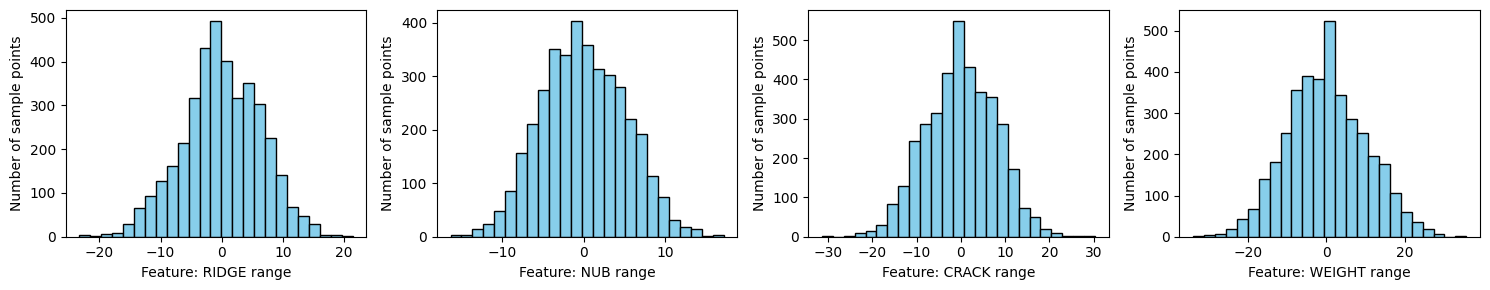

In [18]:
from pmlb import fetch_data
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

pollen = fetch_data('529_pollen')

X = pollen.drop(columns=['target']).values
y = pollen['target'].values

# Data and target shapes
print("Shapes:")
print("Dataset shape:", np.shape(X))
print("Target shape:", np.shape(y), "\n")

# Number of samples
print("Number of samples: ", X.shape[0])

# Number of features
print("Number of features: ", X.shape[1])

# Range of values
print("Range of values: ", np.min(X), "-", np.max(X))

# Scale of values
print("Scale of values: ", np.mean(X), "+/-", np.std(X))

# Variance of values
print("Variance of values: ", np.var(X), "\n")

# Example samples in the dataset with their target labels
print("Example samples in data with target labels:")
print("Sample in data: ", X[0])
print("Target: ", y[0])
print("Sample in data: ", X[1])
print("Target: ", y[1])
print("\n")

# Plotting a histogram for each feature
print("Histogram for each feature:")
num_of_features = X.shape[1]
fig, axs = plt.subplots(1, num_of_features, figsize=(15, 3))

feature_names = ["RIDGE", "NUB", "CRACK", "WEIGHT"]
for i in range(num_of_features):
    axs[i].hist(X[:, i], bins=25, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(f"Feature: {feature_names[i]} range")
    axs[i].set_ylabel("Number of sample points")

plt.tight_layout()
plt.show()




1.   **Splitting the data to test-set and train-set, for
each test-size ratio r ∈ [0.1, 0.2, 0.3, ..., 0.9] using LinearRegression to
train a linear regressor on the train-set and evaluating the accuracy on the test-set.**
2.   **Plotting the the mean squared error of each r (using r as x axis and MSE as y axis).**

Accuracy for r= 0.1 is 0.8051485544605773
Accuracy for r= 0.2 is 0.785079292307957
Accuracy for r= 0.3 is 0.7870182868073134
Accuracy for r= 0.4 is 0.8012986619058978
Accuracy for r= 0.5 is 0.7972054024337328
Accuracy for r= 0.6 is 0.7882378099069794
Accuracy for r= 0.7 is 0.7892364533334839
Accuracy for r= 0.8 is 0.7909022582280129
Accuracy for r= 0.9 is 0.7939593896938234


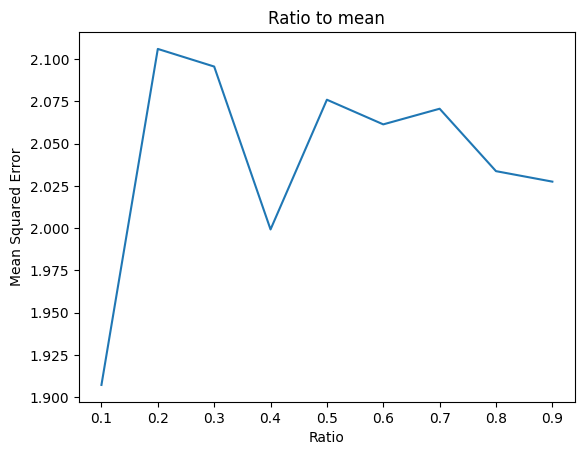

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def accuracy_after_train(ratio, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= ratio)
  #scaling the data in order to promise convergance
  
  model = make_pipeline(StandardScaler(), LinearRegression())
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  m_s_error = mean_squared_error(y_test, y_pred)
  return (model.score(X_test, y_test), m_s_error)

# Plotting the mean squared error according to each ratio
def plot_per_ratio(X, y):
  ratio = np.arange(0.1,1,0.1) 
  means = []
  for r in ratio:
    acc, mean = accuracy_after_train(r, X, y)
    print("Accuracy for r=", "{:.1f} is".format(r), acc)
    means.append(mean)
  plt.plot(ratio, means)
  plt.title("Ratio to mean")
  plt.xlabel("Ratio")
  plt.ylabel("Mean Squared Error")
  plt.show()

plot_per_ratio(X,y)


**Implementing a k-features selection algorithm that returns: (using k=2 and k=3)**


1.   **The set of k features from the dataset that achive the best mean squared error (lowest)**
2.    **The mean squared error achieved on the test-set**




In [20]:
from itertools import combinations

def k_features_selection(train_set, test_set, k):
  X_tr = train_set[0]
  y_tr = train_set[1]
  X_ts = test_set[0]
  y_ts = test_set[1]

  best_features = []
  min_mean = float('inf')

  combs = combinations(range(4), k) # all combinations of k features
  all_combs = [np.array(c) for c in combs] # as arrays

  for comb in all_combs:
    reduced_X_train = X_tr[:, comb] # remove all features but the chosen k features
    reduced_X_test = X_ts[:, comb]

    model = LinearRegression() # train our model
    model.fit(reduced_X_train, y_tr)

    y_pred = model.predict(reduced_X_test)
    mean = mean_squared_error(y_ts, y_pred)
    if mean < min_mean : #searching for best mean
      min_mean = mean
      best_features = comb
  return (min_mean, best_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
min_mean, best_features = k_features_selection((X_train, y_train), (X_test, y_test), 2)
best_features_names = [feature_names[i] for i in best_features]

print("Features giving the best mean squared error on test data with k = 2:", best_features_names)
print("Best mean absolute error on test data with k = 2:", min_mean)

min_mean, best_features = k_features_selection((X_train, y_train), (X_test, y_test), 3)
best_features_names = [feature_names[i] for i in best_features]

print("Features giving the best mean squared error on test data with k = 3:", best_features_names)
print("Best mean absolute error on test data with k = 3:", min_mean)


Features giving the best mean squared error on test data with k = 2: ['RIDGE', 'WEIGHT']
Best mean absolute error on test data with k = 2: 3.152804423193885
Features giving the best mean squared error on test data with k = 3: ['RIDGE', 'NUB', 'WEIGHT']
Best mean absolute error on test data with k = 3: 2.039603344433052
